In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
xls = pd.ExcelFile("Customer_Churn_Data_Large.xlsx")
df_demo = pd.read_excel(xls, "Customer_Demographics")
df_txn = pd.read_excel(xls, "Transaction_History")
df_service = pd.read_excel(xls, "Customer_Service")
df_online = pd.read_excel(xls, "Online_Activity")
df_churn = pd.read_excel(xls, "Churn_Status")


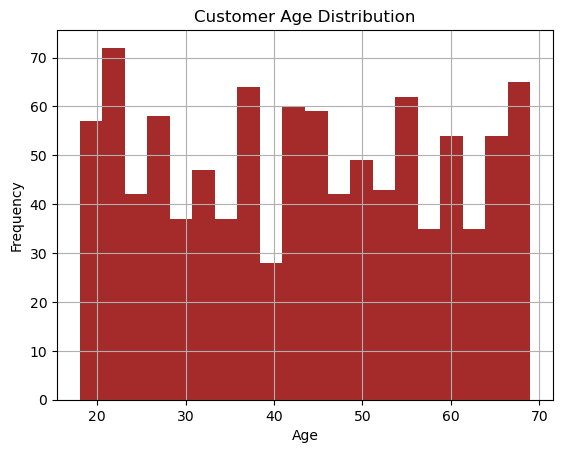

In [3]:
#Age Distrubution
df_demo['Age'].hist(bins=20, color='brown')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


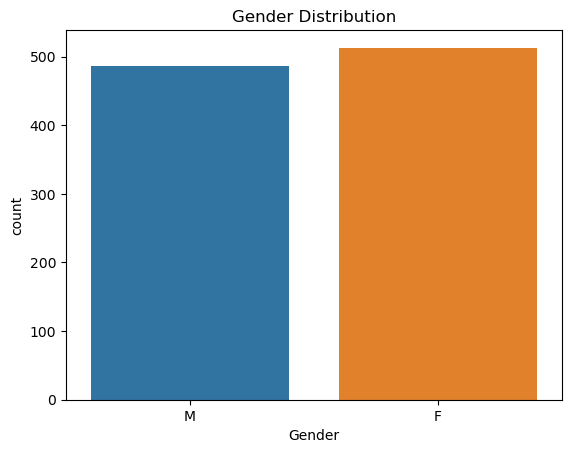

In [4]:
#Gender Distribution
sns.countplot(x='Gender', data=df_demo)
plt.title("Gender Distribution")
plt.show()


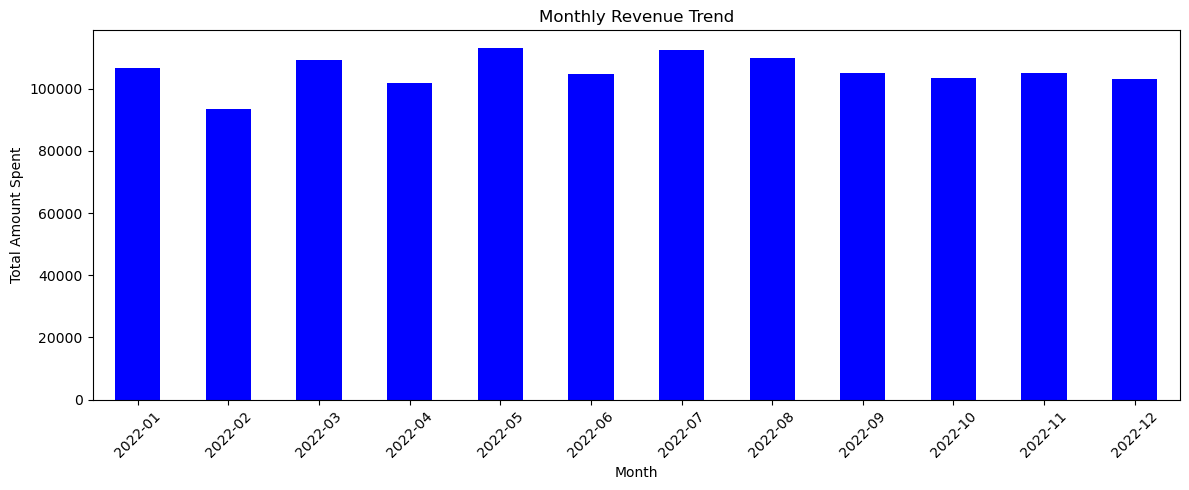

In [5]:
# Convert to monthly period and group
monthly_sales = df_txn.copy()
monthly_sales['Month'] = monthly_sales['TransactionDate'].dt.to_period('M')
monthly_summary = monthly_sales.groupby('Month')['AmountSpent'].sum()

# Plot
monthly_summary.plot(kind='bar', figsize=(12, 5), color='blue')
plt.title('Monthly Revenue Trend')
plt.ylabel('Total Amount Spent')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

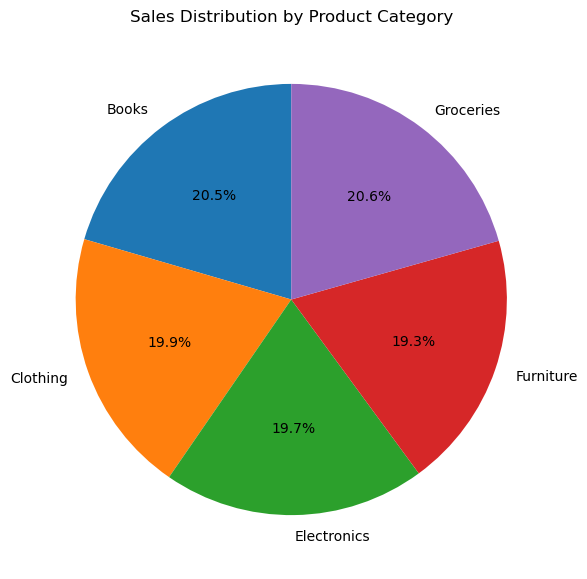

In [6]:
category_sales = df_txn.groupby('ProductCategory')['AmountSpent'].sum()

# Plot
category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), startangle=90)
plt.title('Sales Distribution by Product Category')
plt.ylabel('')
plt.show()


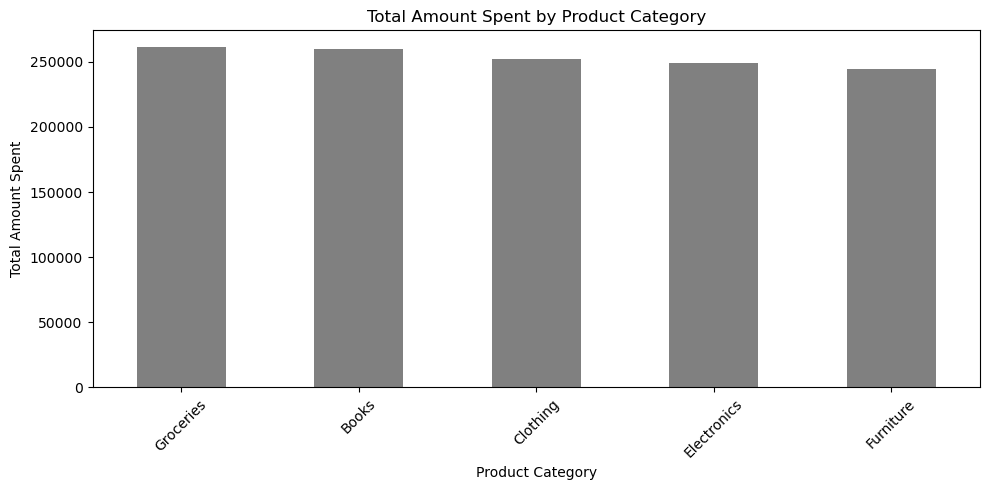

In [7]:
# Group by ProductCategory and sum AmountSpent
category_sales = df_txn.groupby('ProductCategory')['AmountSpent'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 5))
category_sales.plot(kind='bar', color='grey')
plt.title('Total Amount Spent by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

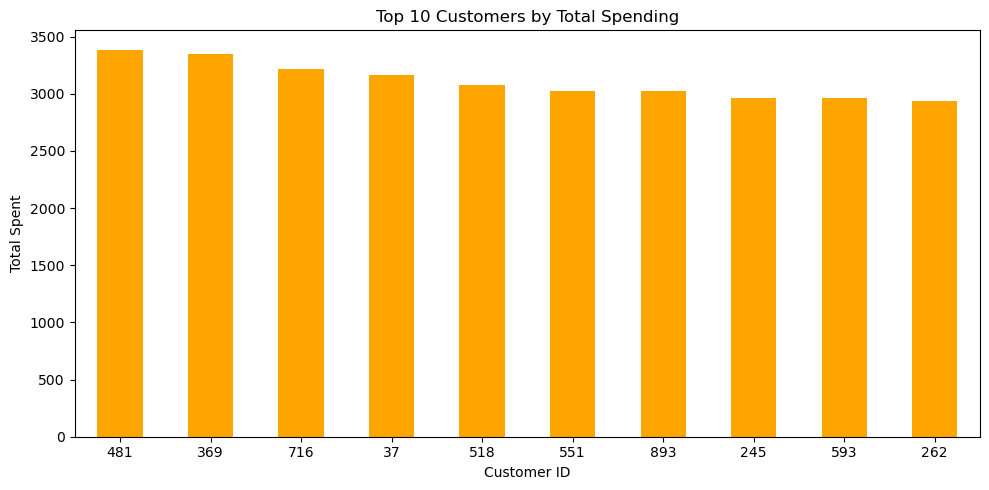

In [8]:
top_customers = df_txn.groupby('CustomerID')['AmountSpent'].sum().nlargest(10)

top_customers.plot(kind='bar', color='orange', figsize=(10, 5))
plt.title('Top 10 Customers by Total Spending')
plt.ylabel('Total Spent')
plt.xlabel('Customer ID')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
# Find null values in AmountSpent
null_amounts =df_txn[df_txn['AmountSpent'].isnull()]

# Display rows with missing AmountSpent
print(null_amounts)

# Count of nulls
print(f"\nTotal missing values in 'AmountSpent': {df_txn['AmountSpent'].isnull().sum()}")

Empty DataFrame
Columns: [CustomerID, TransactionID, TransactionDate, AmountSpent, ProductCategory]
Index: []

Total missing values in 'AmountSpent': 0


In [10]:
# Drop any missing values in AmountSpent
amounts = df_txn['AmountSpent'].dropna()


# Calculate statistics
mean_val = amounts.mean()
median_val = amounts.median()
try:
    mode_val = amounts.mode()[0]
except IndexError:
    mode_val = 'No mode'

# Print results
print(f"Mean Amount Spent: {mean_val:.2f}")
print(f"Median Amount Spent: {median_val:.2f}")
print(f"Mode Amount Spent: {mode_val}")


Mean Amount Spent: 250.71
Median Amount Spent: 250.52
Mode Amount Spent: 101.31


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


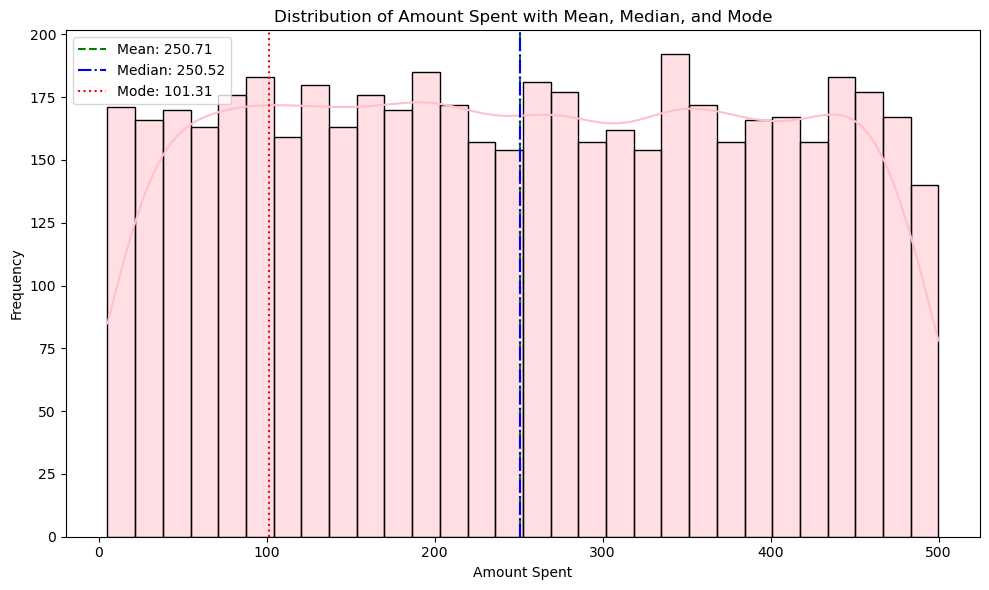

In [11]:
# Plot
plt.figure(figsize=(10, 6))
sns.histplot(amounts, bins=30, kde=True, color='pink')

# Add lines
plt.axvline(mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='blue', linestyle='-.', label=f'Median: {median_val:.2f}')
if mode_val is not None:
    plt.axvline(mode_val, color='red', linestyle=':', label=f'Mode: {mode_val:.2f}')

plt.title('Distribution of Amount Spent with Mean, Median, and Mode')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


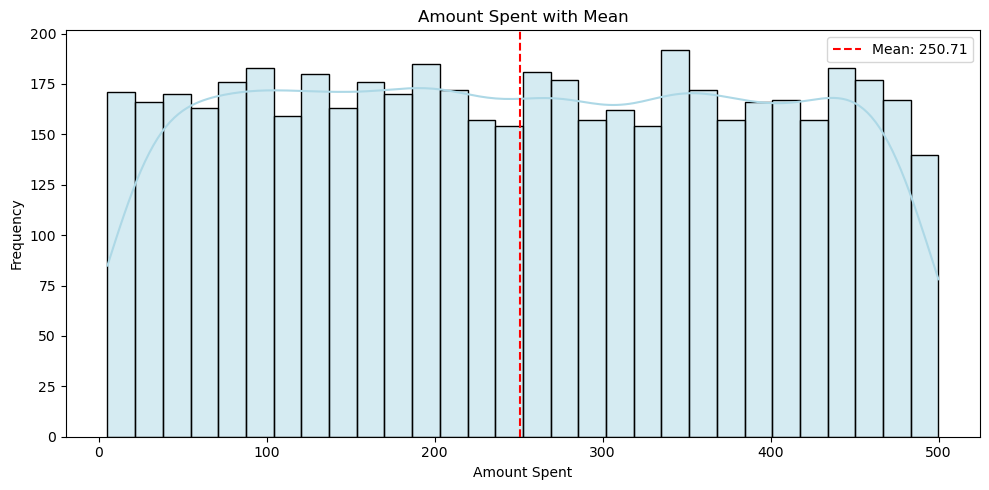

In [12]:
# Histogram with Mean
plt.figure(figsize=(10, 5))
sns.histplot(amounts, bins=30, color='lightblue', kde=True)
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.title('Amount Spent with Mean')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


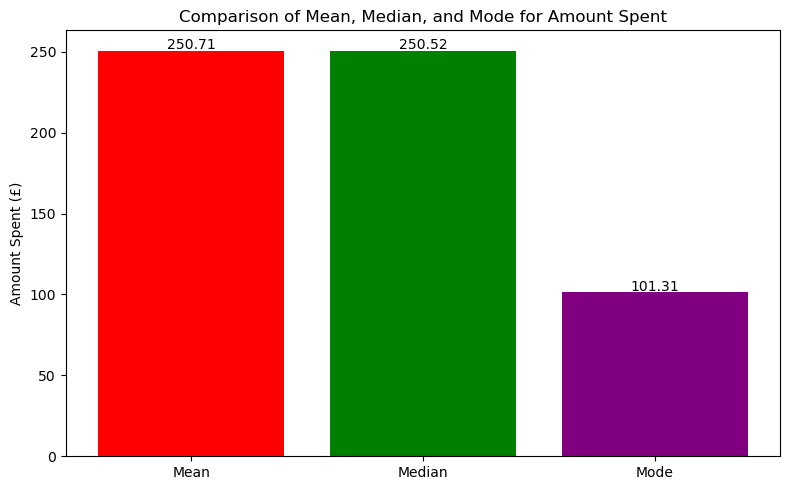

In [13]:
# Data for bar chart
summary_stats = {
    'Mean': mean_val,
    'Median': median_val,
    'Mode': mode_val if mode_val is not None else 0  # fallback if mode not available
}

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(summary_stats.keys(), summary_stats.values(), color=['red', 'green', 'purple'])

# Add value labels
for i, (key, value) in enumerate(summary_stats.items()):
    plt.text(i, value + 1, f'{value:.2f}', ha='center')

plt.title('Comparison of Mean, Median, and Mode for Amount Spent')
plt.ylabel('Amount Spent (£)')
plt.tight_layout()
plt.show()


In [14]:
# Group by ProductCategory and calculate mean AmountSpent
mean_spend_per_category = df_txn.groupby('ProductCategory')['AmountSpent'].mean().sort_values(ascending=False)

# Display the result
print(mean_spend_per_category)


ProductCategory
Groceries      256.013382
Clothing       252.450700
Books          249.341969
Electronics    248.890899
Furniture      246.759899
Name: AmountSpent, dtype: float64


In [15]:
# Group by ProductCategory and calculate median of AmountSpent
median_spend_per_category = df_txn.groupby('ProductCategory')['AmountSpent'].median().sort_values(ascending=False)

# Display result
print(median_spend_per_category)


ProductCategory
Groceries      256.62
Clothing       255.55
Books          252.15
Electronics    248.40
Furniture      241.64
Name: AmountSpent, dtype: float64


In [16]:
# Function to safely get the first mode
def get_mode(series):
    mode = series.mode()
    return mode.iloc[0] if not mode.empty else None

# Group by ProductCategory and apply the mode function
mode_spend_per_category = df_txn.groupby('ProductCategory')['AmountSpent'].apply(get_mode).sort_values(ascending=False)

# Display result
print(mode_spend_per_category)


ProductCategory
Clothing       303.76
Furniture      101.31
Groceries       13.04
Books           12.30
Electronics      6.30
Name: AmountSpent, dtype: float64


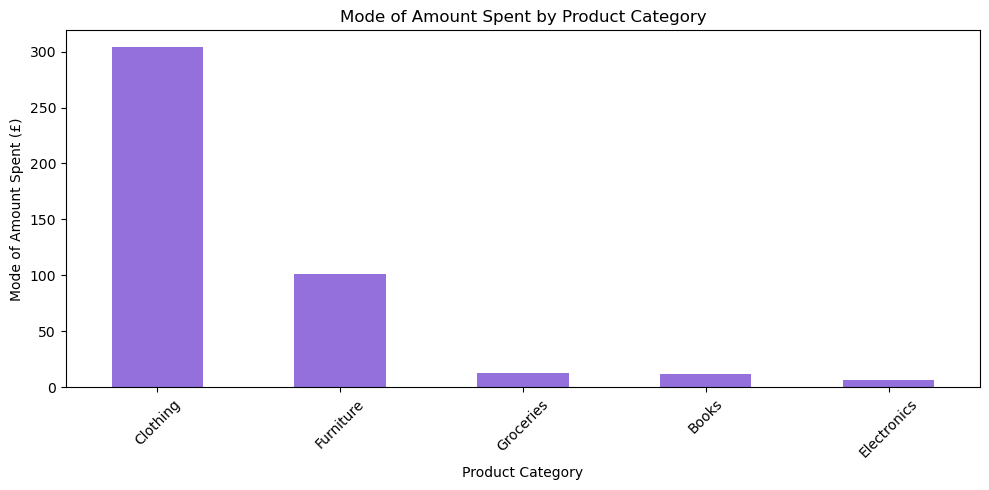

In [17]:
# Drop missing modes (None values)
#Helps identify the most common spend amount in each category.
#Useful for detecting pricing clusters or popular purchase sizes.
mode_spend_per_category_cleaned = mode_spend_per_category.dropna()

# Bar plot
mode_spend_per_category_cleaned.plot(kind='bar', color='mediumpurple', figsize=(10, 5))
plt.title('Mode of Amount Spent by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Mode of Amount Spent (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
# Load Online_Activity sheet
df_online = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name="Online_Activity")

In [19]:
print(df_online.columns)


Index(['CustomerID', 'LastLoginDate', 'LoginFrequency', 'ServiceUsage'], dtype='object')


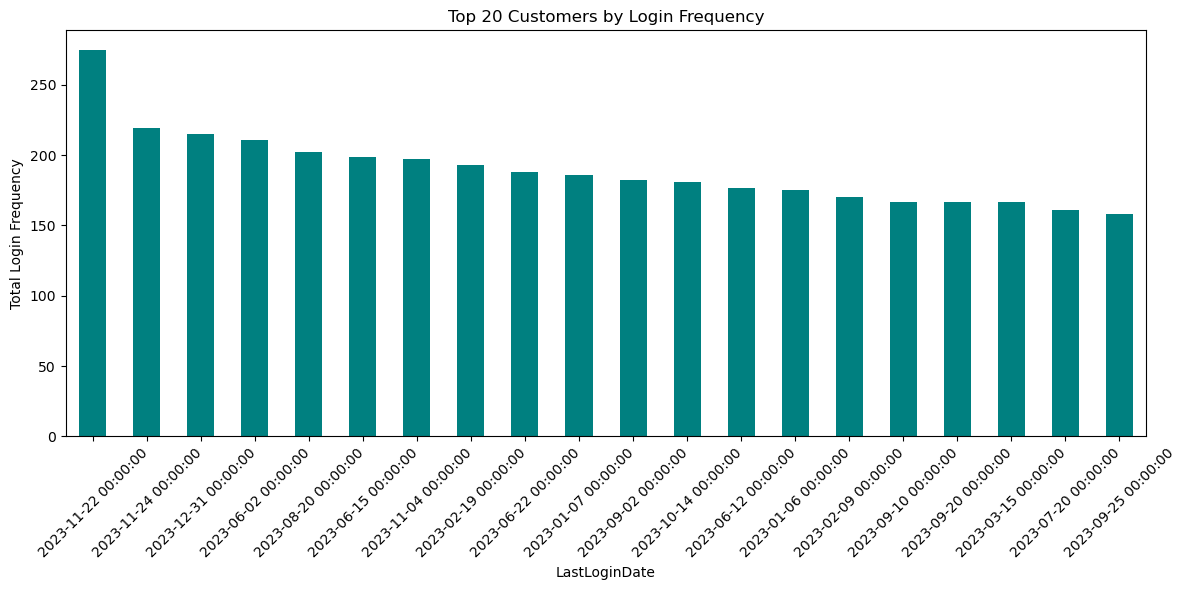

In [20]:

# Group by CustomerID and sum login frequencies
top_customers = df_online.groupby('LastLoginDate')['LoginFrequency'].sum().sort_values(ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_customers.plot(kind='bar', color='teal')
plt.title('Top 20 Customers by Login Frequency')
plt.xlabel('LastLoginDate')
plt.ylabel('Total Login Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


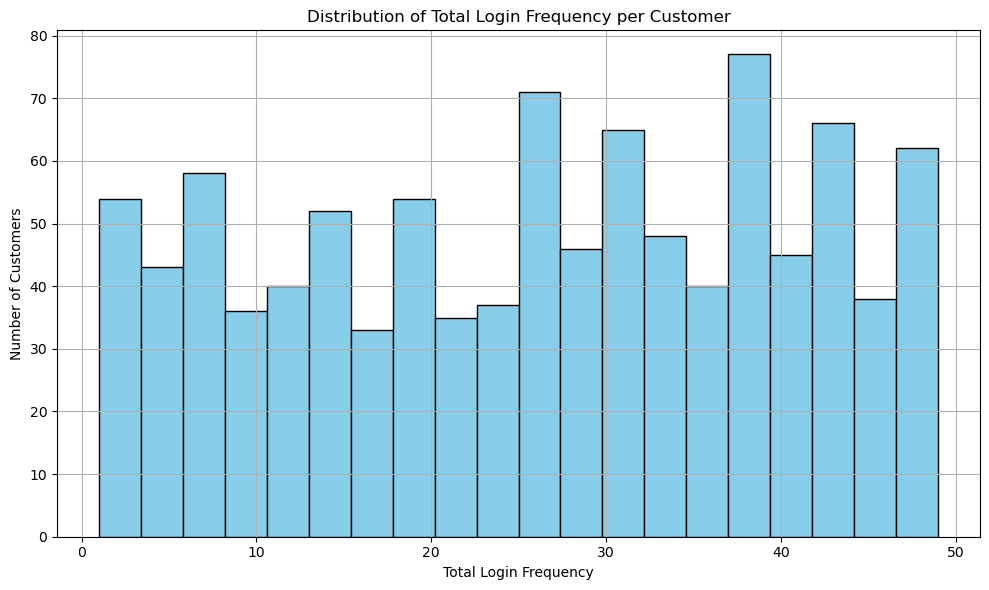

In [21]:
# Group by CustomerID and calculate total login frequency
login_totals = df_online.groupby('CustomerID')['LoginFrequency'].sum()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(login_totals, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Login Frequency per Customer')
plt.xlabel('Total Login Frequency')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Group by ServiceUsage and calculate mean of LoginFrequency (or another numeric column)
mean_usage = df_online.groupby('ServiceUsage')['LoginFrequency'].mean()

print(mean_usage)


ServiceUsage
Mobile App        25.043860
Online Banking    26.862464
Website           25.799353
Name: LoginFrequency, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

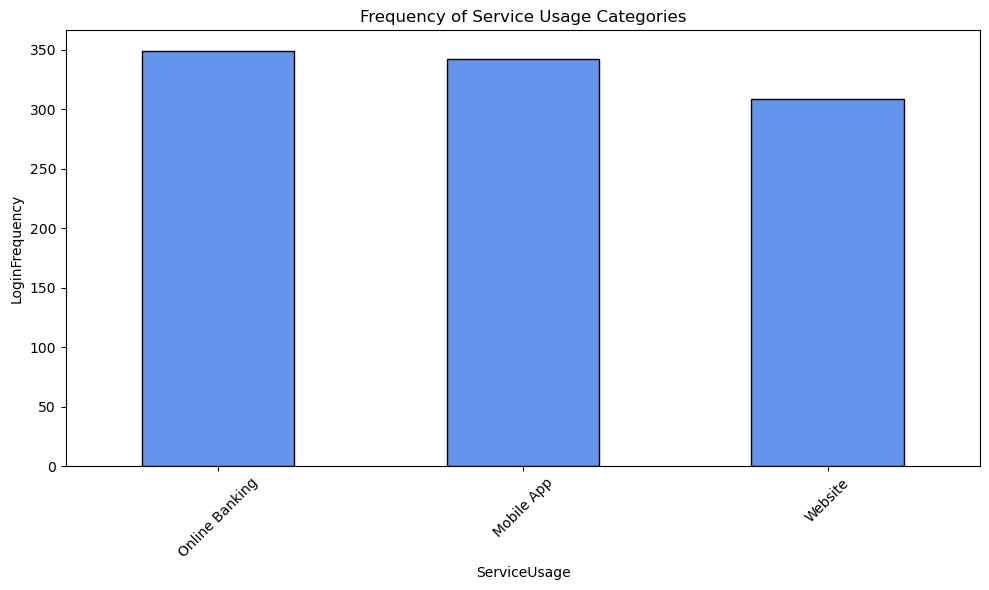

In [23]:
# Count each category in ServiceUsage
service_counts = df_online['ServiceUsage'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
service_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Frequency of Service Usage Categories')
plt.xlabel('ServiceUsage')
plt.ylabel('LoginFrequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

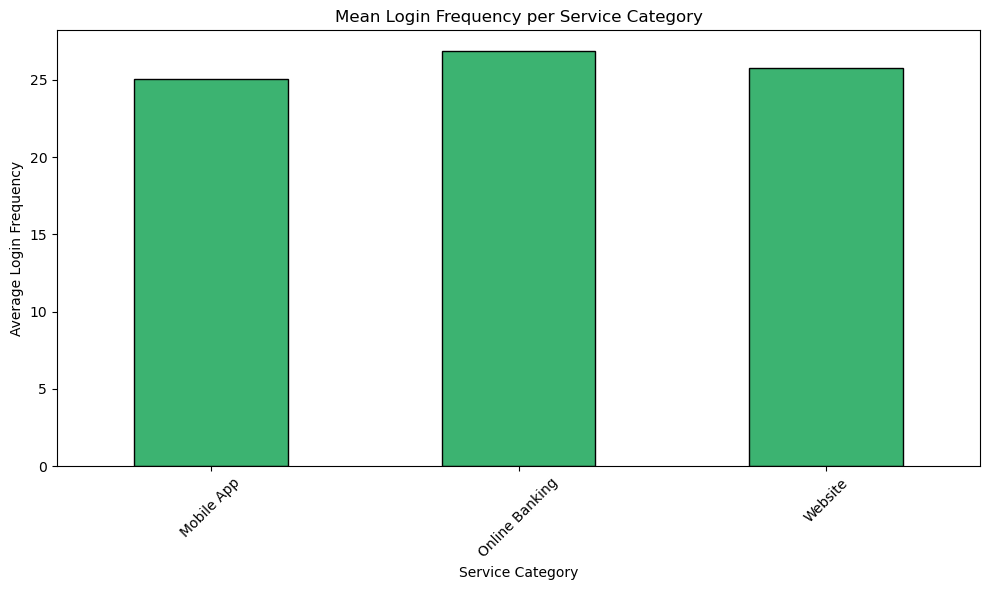

In [24]:
# Plot bar chart
plt.figure(figsize=(10, 6))
mean_usage.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Mean Login Frequency per Service Category')
plt.xlabel('Service Category')
plt.ylabel('Average Login Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Define a function to get the mode(s)
def get_mode(series):
    mode_vals = series.mode()
    if len(mode_vals) == 1:
        return mode_vals.iloc[0]
    else:
        return mode_vals.tolist()  # Return list if multiple modes

# Group by ServiceUsage and apply mode function to LoginFrequency
mode_usage = df_online.groupby('ServiceUsage')['LoginFrequency'].agg(get_mode)

print(mode_usage)


ServiceUsage
Mobile App         [4, 38]
Online Banking    [38, 41]
Website                 33
Name: LoginFrequency, dtype: object


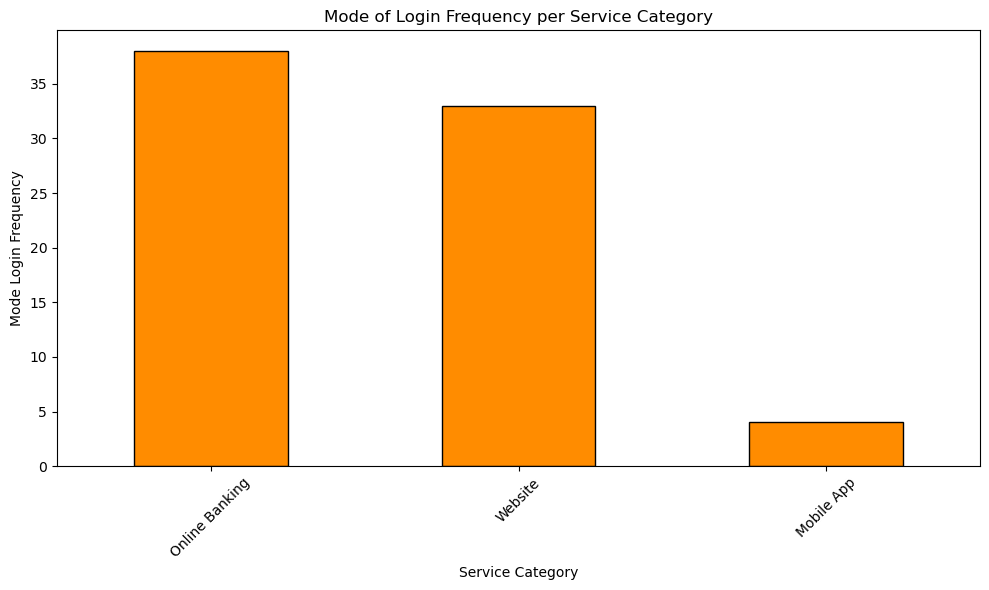

In [26]:
# Safe function to extract only the first mode value
def get_first_mode(series):
    mode_vals = series.mode()
    return mode_vals.iloc[0] if len(mode_vals) > 0 else None

# Apply groupby and get first mode per ServiceUsage
mode_usage = df_online.groupby('ServiceUsage')['LoginFrequency'].agg(get_first_mode).dropna()

# Plot the result
plt.figure(figsize=(10, 6))
mode_usage.sort_values(ascending=False).plot(kind='bar', color='darkorange', edgecolor='black')
plt.title('Mode of Login Frequency per Service Category')
plt.xlabel('Service Category')
plt.ylabel('Mode Login Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

InteractionType
Feedback     35.93
Complaint    33.43
Inquiry      30.64
Name: proportion, dtype: float64


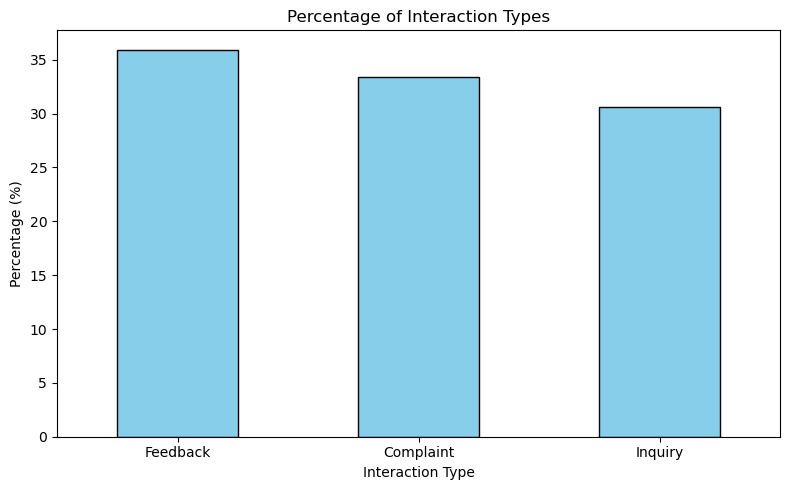

In [27]:
# Step 2: Calculate percentage of each InteractionType
interaction_percent = df_service['InteractionType'].value_counts(normalize=True) * 100
interaction_percent = interaction_percent.round(2)

# Step 3: Display the percentages
print(interaction_percent)

# Step 4: Visualize with a bar chart
plt.figure(figsize=(8, 5))
interaction_percent.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Percentage of Interaction Types")
plt.ylabel("Percentage (%)")
plt.xlabel("Interaction Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [28]:
# Filter only complaint interactions
complaints = df_service[df_service['InteractionType'] == 'Complaint']

# Mean number of complaints per customer
mean_complaints_per_customer = complaints['CustomerID'].value_counts().mean()

print("Mean number of complaints per customer:", mean_complaints_per_customer)


Mean number of complaints per customer: 1.127946127946128


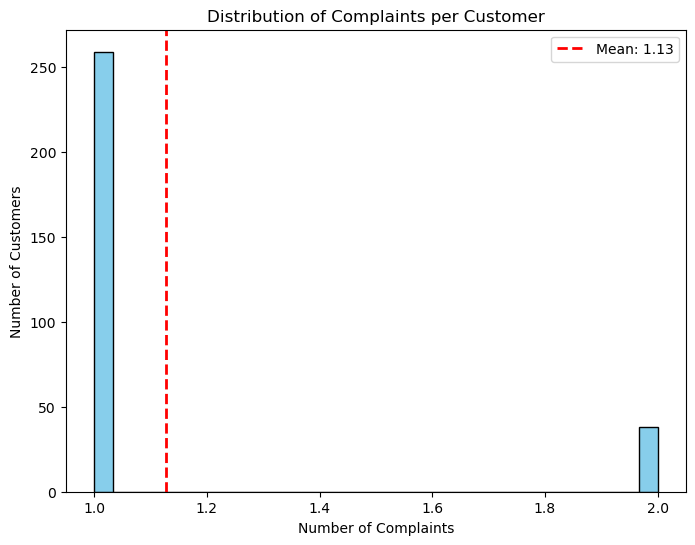

In [29]:
# Count the number of complaints per customer
complaints_per_customer = complaints['CustomerID'].value_counts()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(complaints_per_customer, bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_complaints_per_customer, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_complaints_per_customer:.2f}')
plt.title('Distribution of Complaints per Customer')
plt.xlabel('Number of Complaints')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()


In [30]:
# Count resolution statuses
resolution_counts = df_service['ResolutionStatus'].value_counts(dropna=False)

# Calculate percentage
resolution_percentages = resolution_counts / resolution_counts.sum() * 100

# Combine into a DataFrame for display or visualization
resolution_df = pd.DataFrame({
    'ResolutionStatus': resolution_percentages.index,
    'Percentage': resolution_percentages.values
})

print(resolution_df)


  ResolutionStatus  Percentage
0         Resolved   52.195609
1       Unresolved   47.804391


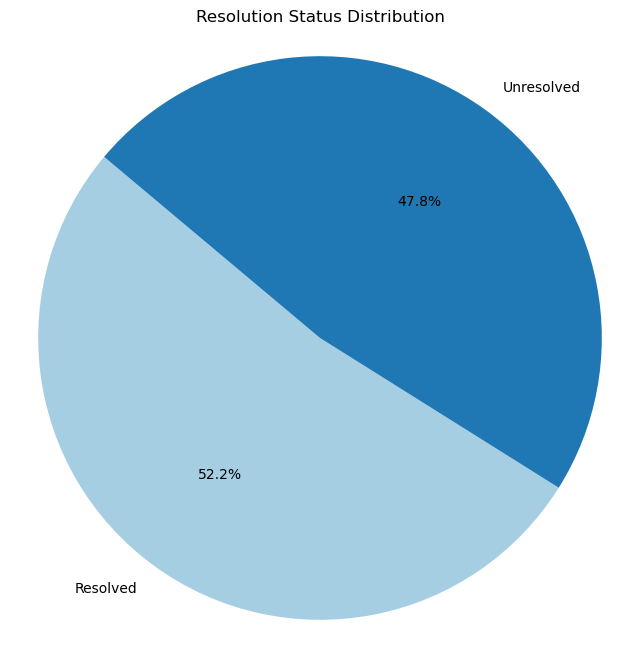

In [31]:
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(resolution_percentages, labels=resolution_percentages.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Resolution Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()


In [32]:
print(df_service['ResolutionStatus'].unique())
print(df_service[df_service['ResolutionStatus'] == 'Resolved'].shape[0])


['Resolved' 'Unresolved']
523


In [33]:
print(df_service['ResolutionStatus'].isna().sum())
print(df_service.shape[0])  # Total number of rows



0
1002


In [34]:
print(df_service.columns.tolist())


['CustomerID', 'InteractionID', 'InteractionDate', 'InteractionType', 'ResolutionStatus']


In [39]:
# Count of each ResolutionStatus
print(df_service['ResolutionStatus'].value_counts())


ResolutionStatus
Resolved      523
Unresolved    479
Name: count, dtype: int64


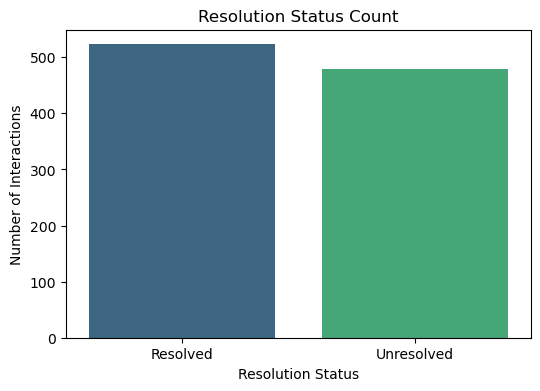

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_service, x='ResolutionStatus', palette='viridis')
plt.title('Resolution Status Count')
plt.xlabel('Resolution Status')
plt.ylabel('Number of Interactions')
plt.show()


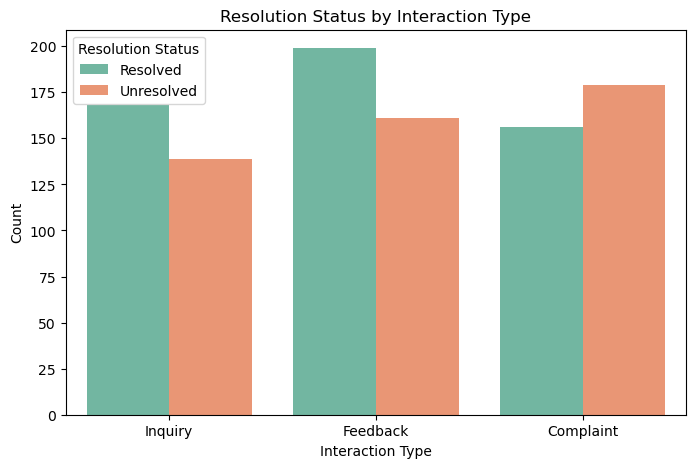

In [42]:

plt.figure(figsize=(8,5))
sns.countplot(data=df_service, x='InteractionType', hue='ResolutionStatus', palette='Set2')
plt.title('Resolution Status by Interaction Type')
plt.xlabel('Interaction Type')
plt.ylabel('Count')
plt.legend(title='Resolution Status')
plt.show()



In [44]:
# Filter only resolved interactions
resolved = df_service[df_service['ResolutionStatus'] == 'Resolved']

# Total interactions per customer
total_interactions = df_service.groupby('CustomerID')['InteractionID'].count()

# Resolved interactions per customer
resolved_interactions = resolved.groupby('CustomerID')['InteractionID'].count()

# Resolution rate = resolved / total
resolution_rate_customer = (resolved_interactions / total_interactions) * 100

# Fill missing values with 0 (customers with no resolved interactions)
resolution_rate_customer = resolution_rate_customer.fillna(0)

print(resolution_rate_customer.head())  # View sample


CustomerID
1    100.0
2    100.0
3    100.0
4     50.0
6    100.0
Name: InteractionID, dtype: float64


In [45]:
# Total interactions per type
total_by_type = df_service.groupby('InteractionType')['InteractionID'].count()

# Resolved interactions per type
resolved_by_type =df_service[df_service['ResolutionStatus'] == 'Resolved'].groupby('InteractionType')['InteractionID'].count()

# Resolution rate per interaction type
resolution_rate_type = (resolved_by_type / total_by_type) * 100

print(resolution_rate_type)


InteractionType
Complaint    46.567164
Feedback     55.277778
Inquiry      54.723127
Name: InteractionID, dtype: float64


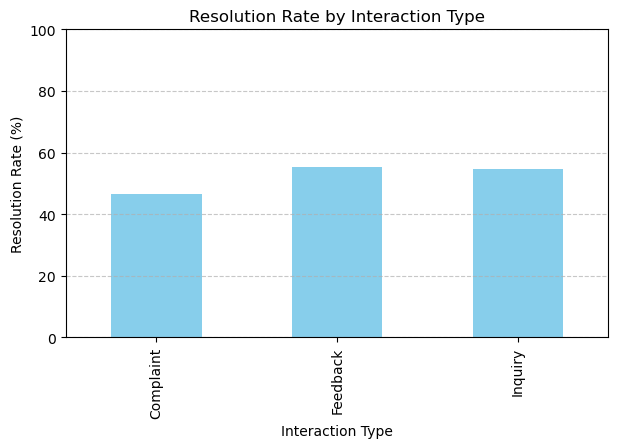

In [46]:
# Plot resolution rates
resolution_rate_type.plot(kind='bar', color='skyblue', figsize=(7,4))
plt.title('Resolution Rate by Interaction Type')
plt.ylabel('Resolution Rate (%)')
plt.xlabel('Interaction Type')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [48]:
# Count of churned vs. active customers
print(df_churn['ChurnStatus'].value_counts())


ChurnStatus
0    796
1    204
Name: count, dtype: int64


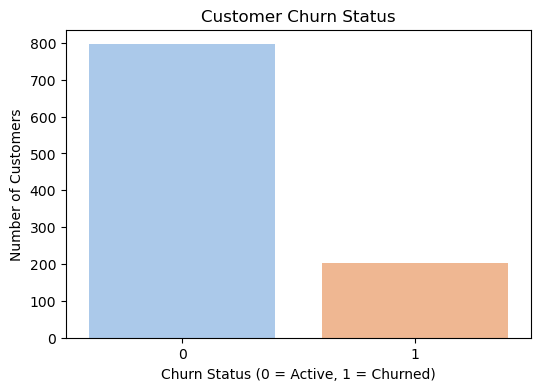

In [49]:


plt.figure(figsize=(6,4))
sns.countplot(data=df_churn, x='ChurnStatus', palette='pastel')
plt.title('Customer Churn Status')
plt.xlabel('Churn Status (0 = Active, 1 = Churned)')
plt.ylabel('Number of Customers')
plt.show()



In [50]:
churn_percentage =df_churn['ChurnStatus'].value_counts(normalize=True) * 100
print(churn_percentage)


ChurnStatus
0    79.6
1    20.4
Name: proportion, dtype: float64


In [ ]:
df.groupby('Gender')['ChurnStatus'].mean()

In [51]:
print(df_churn['ChurnStatus'].unique())
print(df_churn['ChurnStatus'].isnull().sum())
print(df_churn['ChurnStatus'].dtype)


[0 1]
0
int64


In [52]:
churn_rate = df_churn['ChurnStatus'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")


Churn Rate: 20.40%


In [61]:
# Count how many times each unique item appears
usage_counts = df_service['ResolutionStatus'].value_counts()

# Get the minimum and maximum counts
min_count = usage_counts.min()
max_count = usage_counts.max()

print("Minimum usage count:", min_count)
print("Maximum usage count:", max_count)




Minimum usage count: 479
Maximum usage count: 523


In [62]:
# Items with minimum count
print("Least common items:")
print(usage_counts[usage_counts == min_count])

# Items with maximum count
print("Most common items:")
print(usage_counts[usage_counts == max_count])


Least common items:
ResolutionStatus
Unresolved    479
Name: count, dtype: int64
Most common items:
ResolutionStatus
Resolved    523
Name: count, dtype: int64


In [81]:
Q1 = df['AmountSpent'].quantile(0.25)
Q3 = df['AmountSpent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers
df['IsOutlier'] = (df['AmountSpent'] < lower_bound) | (df['AmountSpent'] > upper_bound)

# View outliers
outliers = df[df['IsOutlier']]
print(outliers[['CustomerID', 'AmountSpent']])


Empty DataFrame
Columns: [CustomerID, AmountSpent]
Index: []


In [82]:
from scipy.stats import zscore

df['AmountSpent_zscore'] = zscore(df['AmountSpent'])
df['IsOutlier'] = df['AmountSpent_zscore'].abs() > 3

# View outliers
print(df[df['IsOutlier']][['CustomerID', 'AmountSpent']])


Empty DataFrame
Columns: [CustomerID, AmountSpent]
Index: []


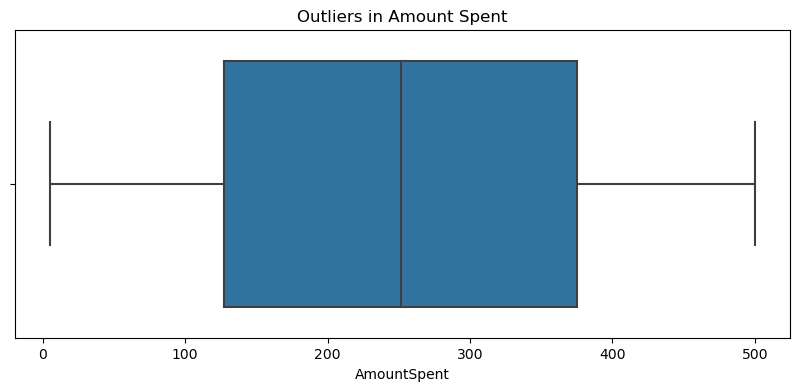

In [83]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['AmountSpent'])
plt.title("Outliers in Amount Spent")
plt.show()


In [68]:
# Step 3: Merge Sheets on CustomerID
df = df_demo.merge(df_txn, on="CustomerID", how="left") \
            .merge(df_service, on="CustomerID", how="left") \
            .merge(df_online, on="CustomerID", how="left") \
            .merge(df_churn, on="CustomerID", how="left")


In [69]:
print(df)

      CustomerID  Age Gender MaritalStatus IncomeLevel  TransactionID  \
0              1   62      M        Single         Low           7194   
1              2   65      M       Married         Low           7250   
2              2   65      M       Married         Low           9660   
3              2   65      M       Married         Low           2998   
4              2   65      M       Married         Low           1228   
...          ...  ...    ...           ...         ...            ...   
6807        1000   34      M       Widowed         Low           2724   
6808        1000   34      M       Widowed         Low           2917   
6809        1000   34      M       Widowed         Low           2979   
6810        1000   34      M       Widowed         Low           8594   
6811        1000   34      M       Widowed         Low           5529   

     TransactionDate  AmountSpent ProductCategory  InteractionID  \
0         2022-03-27       416.50     Electronics      

Missing Values per Column:
InteractionID       1608
ResolutionStatus    1608
InteractionType     1608
InteractionDate     1608
CustomerID             0
ServiceUsage           0
LoginFrequency         0
LastLoginDate          0
ProductCategory        0
Age                    0
AmountSpent            0
TransactionDate        0
TransactionID          0
IncomeLevel            0
MaritalStatus          0
Gender                 0
ChurnStatus            0
dtype: int64


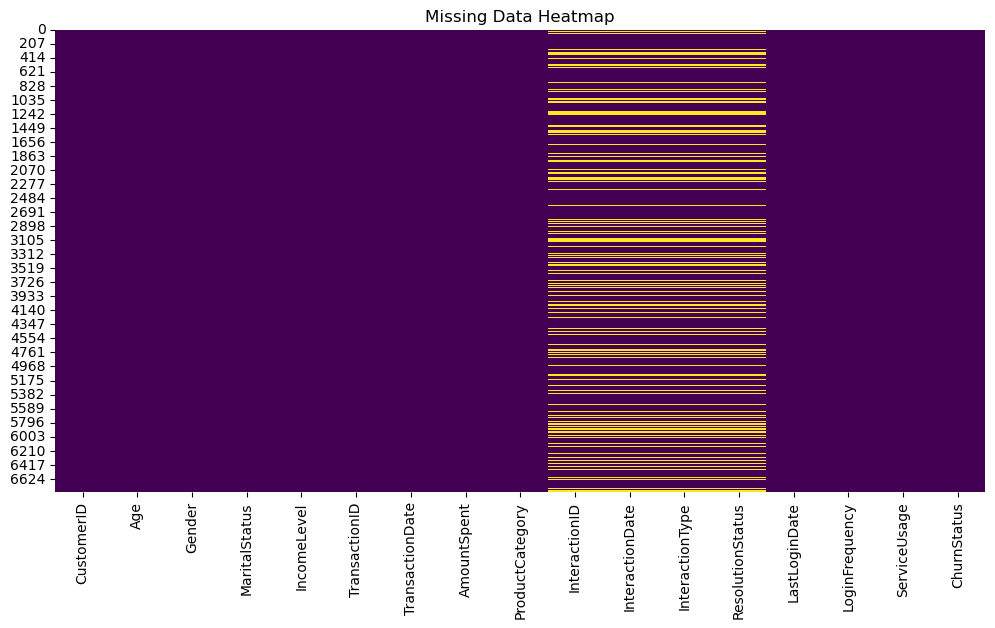

In [70]:
# Step 4: Explore Missing Data
print("Missing Values per Column:")
print(df.isnull().sum().sort_values(ascending=False))

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()



In [71]:
# Step 5: Handle Missing Data
df.fillna(df.mean(numeric_only=True), inplace=True)
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
#Encoding

In [72]:
# Step 6: Encode Categorical Features
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    if df[col].nunique() <= 10:
        df[col] = le.fit_transform(df[col])


In [ ]:
#Modelling,Scalabilty,Feature Engineering

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Drop 'CustomerID' and 'ChurnStatus' from features
X = df.drop(['CustomerID', 'ChurnStatus'], axis=1)
y = df['ChurnStatus']

# 2. Drop datetime columns
X = X.select_dtypes(exclude=['datetime64[ns]', 'datetime64[ns, UTC]'])

# 3. Encode categorical variables (if any)
X = pd.get_dummies(X, drop_first=True)

# 4. Fill missing values
X = X.fillna(X.mean())

# 5. Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1111
           1       1.00      0.84      0.91       252

    accuracy                           0.97      1363
   macro avg       0.98      0.92      0.95      1363
weighted avg       0.97      0.97      0.97      1363



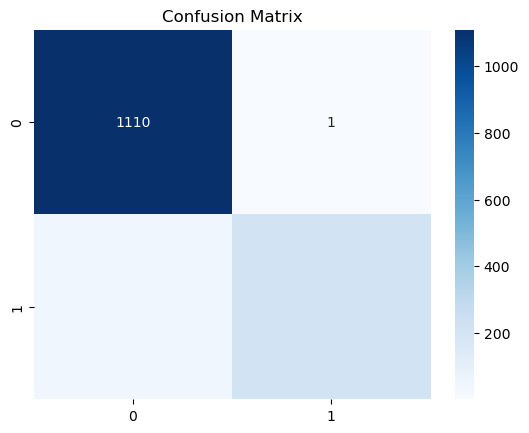

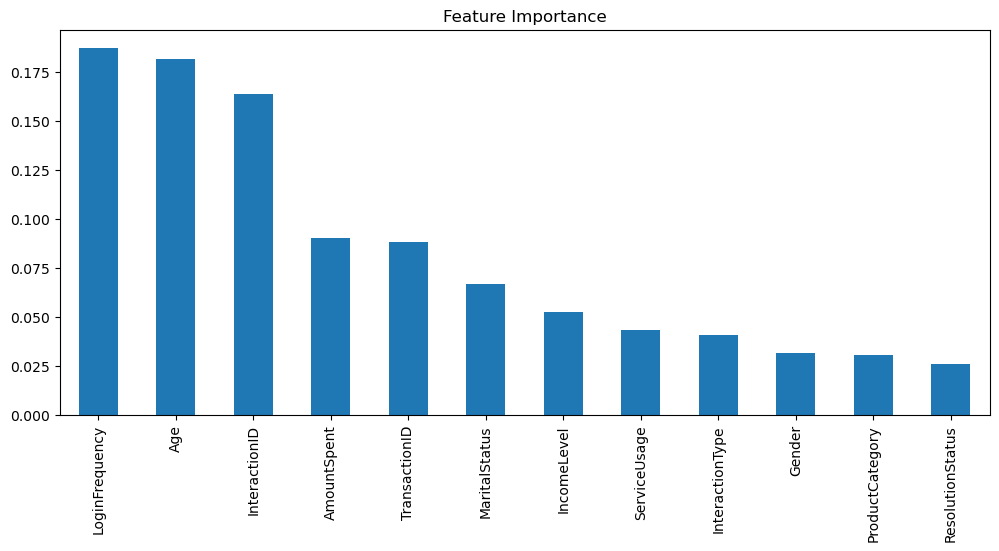

In [79]:
# Step 9: Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 10: Evaluate Model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Step 11: Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
plt.title("Feature Importance")
plt.show()


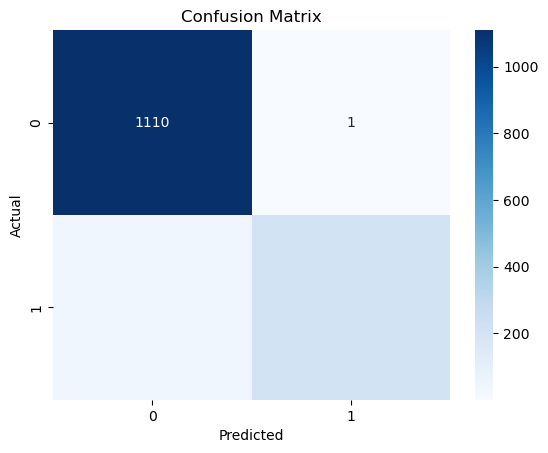

In [80]:
#What Looks Good:
#Metric	                  Meaning	                                                     Score
#Accuracy	            Overall % of correct predictions	                              97% (Excellent)
#Precision (Class 1)	Of those predicted as churned, how many actually churned?	      1.00 (Perfect)
#Recall (Class 1)	    Of actual churned customers, how many were caught?	              0.84 (Good but not perfect)
#F1-Score (Class 1)	     Balance of precision & recall	                                  0.91 (Very good)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      1111
           1       0.00      0.00      0.00       252

    accuracy                           0.82      1363
   macro avg       0.41      0.50      0.45      1363
weighted avg       0.66      0.82      0.73      1363



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


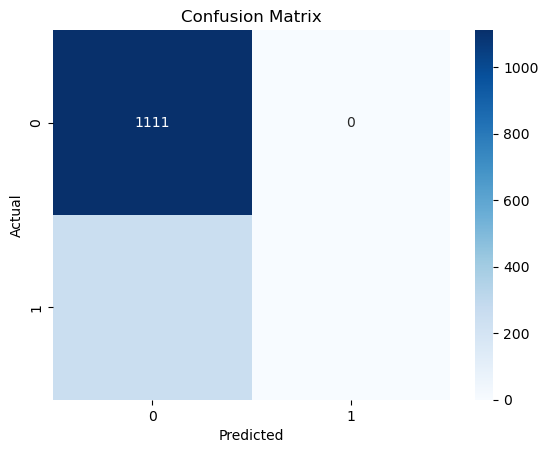

In [84]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn


# 1. Prepare Features and Target
X = df.drop(['CustomerID', 'ChurnStatus'], axis=1)
y = df['ChurnStatus']

# 2. Drop datetime columns (if any)
X = X.select_dtypes(exclude=['datetime64[ns]', 'datetime64[ns, UTC]'])

# 3. Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 4. Fill missing values
X = X.fillna(X.mean())

# 5. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 7. Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 8. Predict
y_pred = model.predict(X_test)

# 9. Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))

# 10. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Recall for churn = 0.00 → your model failed to identify any churners.

#F1-score for churn = 0.00 → no balance of precision/recall.

#Overall Accuracy = 82%, but this is misleading because the model just predicts the majority class (0).

